# Import Dependencies

In [59]:
# Import dependencies
import pandas as pd
import os 
import json
import time
import matplotlib.pyplot as plt

# Data Retrieval Logic

In [2]:
# Airlines data csv file path
airlines_data_1 = os.path.join("Resources/airlines_split_1.csv")
airlines_data_2 = os.path.join("Resources/airlines_split_2.csv")
airlines_data_3 = os.path.join("Resources/airlines_split_3.csv")
airlines_data_4 = os.path.join("Resources/airlines_split_4.csv")
airlines_data_5 = os.path.join("Resources/airlines_split_5.csv")
airlines_data_6 = os.path.join("Resources/airlines_split_6.csv")
airlines_data_7 = os.path.join("Resources/airlines_split_7.csv")
airlines_data_8 = os.path.join("Resources/airlines_split_8.csv")
airlines_data_9 = os.path.join("Resources/airlines_split_9.csv")


In [4]:
# Loop through the rows in the data frame 
file_name = "airlines_split_"
for index in range(1,10):
    file_path = os.path.join("Resources",f"{file_name}{index}.csv")
    if index == 1:
        df = pd.read_csv(file_path, low_memory=False)
    else:
        df = df.append(pd.read_csv(file_path, low_memory=False))

df

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,0,2020,1,1,1,3,1/1/2020,WN,5888,N951WN,...,95.0,122.0,74.0,363,2,8.0,0.0,27.0,0.0,33.0
1,1,2020,1,1,1,3,1/1/2020,WN,6276,N467WN,...,90.0,92.0,71.0,363,2,NaN,NaN,NaN,NaN,NaN
2,2,2020,1,1,1,3,1/1/2020,WN,4598,N7885A,...,70.0,68.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
3,3,2020,1,1,1,3,1/1/2020,WN,4761,N551WN,...,75.0,75.0,63.0,333,2,NaN,NaN,NaN,NaN,NaN
4,4,2020,1,1,1,3,1/1/2020,WN,5162,N968WN,...,80.0,67.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345841,2745842,2020,2,6,13,6,6/13/2020,AS,1209,N413AS,...,375.0,342.0,329.0,2677,11,NaN,NaN,NaN,NaN,NaN
345842,2745843,2020,2,6,13,6,6/13/2020,AS,1216,N929VA,...,176.0,170.0,145.0,1107,5,NaN,NaN,NaN,NaN,NaN
345843,2745844,2020,2,6,13,6,6/13/2020,AS,1217,N929VA,...,185.0,175.0,154.0,1107,5,NaN,NaN,NaN,NaN,NaN
345844,2745845,2020,2,6,13,6,6/13/2020,AS,1223,N841VA,...,165.0,164.0,145.0,978,4,NaN,NaN,NaN,NaN,NaN


# Data Cleanup
* Trim Columns
* Identify Unique Values
* Rename Column Names

In [5]:
# Rename Dataframe with New Columns 
airlines_df = df[["YEAR", "MONTH", "FL_DATE", "MKT_UNIQUE_CARRIER", "MKT_CARRIER_FL_NUM","ORIGIN",
                  "ORIGIN_CITY_NAME","DEST", "DEST_CITY_NAME", "CANCELLED", "CANCELLATION_CODE",
                  "DEP_DELAY", "ARR_DELAY","CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY",
                  "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]]

airlines_df


,YEAR,MONTH,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CANCELLED,CANCELLATION_CODE,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1/1/2020,WN,5888,ONT,"Ontario, CA",SFO,"San Francisco, CA",0,NaN,41.0,68.0,8.0,0.0,27.0,0.0,33.0
1,2020,1,1/1/2020,WN,6276,ONT,"Ontario, CA",SFO,"San Francisco, CA",0,NaN,-4.0,-2.0,NaN,NaN,NaN,NaN,NaN
2,2020,1,1/1/2020,WN,4598,ONT,"Ontario, CA",SJC,"San Jose, CA",0,NaN,-4.0,-6.0,NaN,NaN,NaN,NaN,NaN
3,2020,1,1/1/2020,WN,4761,ONT,"Ontario, CA",SJC,"San Jose, CA",0,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN
4,2020,1,1/1/2020,WN,5162,ONT,"Ontario, CA",SJC,"San Jose, CA",0,NaN,1.0,-12.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345841,2020,6,6/13/2020,AS,1209,SEA,"Seattle, WA",HNL,"Honolulu, HI",0,NaN,-2.0,-35.0,NaN,NaN,NaN,NaN,NaN
345842,2020,6,6/13/2020,AS,1216,PHX,"Phoenix, AZ",SEA,"Seattle, WA",0,NaN,-13.0,-19.0,NaN,NaN,NaN,NaN,NaN
345843,2020,6,6/13/2020,AS,1217,SEA,"Seattle, WA",PHX,"Phoenix, AZ",0,NaN,-2.0,-12.0,NaN,NaN,NaN,NaN,NaN
345844,2020,6,6/13/2020,AS,1223,SNA,"Santa Ana, CA",SEA,"Seattle, WA",0,NaN,-11.0,-12.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# Print the unique series
airlines_df["CANCELLATION_CODE"].unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

In [7]:
# Print the unique series when flights were cancelled
cancelled_df = airlines_df.loc[airlines_df["CANCELLED"] == 1]
cancelled_df["CANCELLATION_CODE"].unique()

array(['A', 'C', 'B', 'D'], dtype=object)

In [8]:
# Renamed columns in dataframe
renamed_df= airlines_df.rename(columns={"YEAR": "Year",
                                        "MONTH": "Month",
                                        "FL_DATE": "Full Flight Date",
                                        "MKT_UNIQUE_CARRIER": "Airline Carrier",
                                        "MKT_CARRIER_FL_NUM": "Flight Number",
                                        "ORIGIN": "Flight Deparature Airport",
                                        "ORIGIN_CITY_NAME": "Flight Departure City",
                                        "DEST": "Flight Arrival Airport",
                                        "DEST_CITY_NAME": "Flight Arrival City",
                                        "CANCELLED": "Flight Cancelled/ Not Cancelled",
                                        "CANCELLATION_CODE": "Reason for Cancellation",
                                        "DEP_DELAY": "Departure Delay",
                                        "ARR_DELAY": "Arrival Delay",
                                        "CARRIER_DELAY": "Carrier Delay",
                                        "WEATHER_DELAY": "Weather Delay",
                                        "NAS_DELAY": "National Aviation System Delay",
                                        "SECURITY_DELAY": "Security Delay",
                                        "LATE_AIRCRAFT_DELAY": "Late Aircraft Delay"
                                       })
renamed_df.head()

,Year,Month,Full Flight Date,Airline Carrier,Flight Number,Flight Deparature Airport,Flight Departure City,Flight Arrival Airport,Flight Arrival City,Flight Cancelled/ Not Cancelled,Reason for Cancellation,Departure Delay,Arrival Delay,Carrier Delay,Weather Delay,National Aviation System Delay,Security Delay,Late Aircraft Delay
0,2020,1,1/1/2020,WN,5888,ONT,"Ontario, CA",SFO,"San Francisco, CA",0,NaN,41.0,68.0,8.0,0.0,27.0,0.0,33.0
1,2020,1,1/1/2020,WN,6276,ONT,"Ontario, CA",SFO,"San Francisco, CA",0,NaN,-4.0,-2.0,NaN,NaN,NaN,NaN,NaN
2,2020,1,1/1/2020,WN,4598,ONT,"Ontario, CA",SJC,"San Jose, CA",0,NaN,-4.0,-6.0,NaN,NaN,NaN,NaN,NaN
3,2020,1,1/1/2020,WN,4761,ONT,"Ontario, CA",SJC,"San Jose, CA",0,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN
4,2020,1,1/1/2020,WN,5162,ONT,"Ontario, CA",SJC,"San Jose, CA",0,NaN,1.0,-12.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Determine what to set the index to
print(renamed_df.nunique(dropna = True))

Year                                  1
Month                                 6
Full Flight Date                    182
Airline Carrier                      10
Flight Number                      7003
Flight Deparature Airport           375
Flight Departure City               368
Flight Arrival Airport              375
Flight Arrival City                 368
Flight Cancelled/ Not Cancelled       2
Reason for Cancellation               4
Departure Delay                    1371
Arrival Delay                      1393
Carrier Delay                      1131
Weather Delay                       642
National Aviation System Delay      526
Security Delay                      105
Late Aircraft Delay                 774
dtype: int64


# Summary Statistics
* Determine the route that has the maximum cancellations
* Determine the route that has the maximum delays
* Determine the airlines that has the maximum cancellations
* Determine the airlines that has the maximum delays

In [22]:
# Determine the route that has maximum cancellations
cancelled_df = renamed_df.loc[renamed_df['Flight Cancelled/ Not Cancelled'] == 1]
group_df = cancelled_df.groupby(['Flight Deparature Airport', 'Flight Arrival Airport'])
cancel_count_df = group_df.sum()["Flight Cancelled/ Not Cancelled"]
cancel_count_df.sort_values(ascending=False).head(1)

Flight Deparature Airport  Flight Arrival Airport
SFO                        LAX                       521
Name: Flight Cancelled/ Not Cancelled, dtype: int64

In [36]:
# Determine the route that has maximum delays
delay_df = renamed_df.loc[(renamed_df['Flight Cancelled/ Not Cancelled'] == 0) &
                          ((renamed_df['Departure Delay'] > 0) |
                           (renamed_df['Arrival Delay'] > 0) |
                           (renamed_df['Carrier Delay'] > 0) |
                           (renamed_df['Weather Delay'] > 0) |
                           (renamed_df['National Aviation System Delay'] > 0) |
                           (renamed_df['Security Delay'] > 0) |
                           (renamed_df['Late Aircraft Delay'] > 0))]
group_df = delay_df.groupby(['Flight Deparature Airport', 'Flight Arrival Airport'])
delay_count_df = group_df.count()
delay_count_df = delay_count_df[["Departure Delay",
                                 "Arrival Delay",
                                 "Carrier Delay",
                                 "Weather Delay",
                                 "National Aviation System Delay",
                                 "Security Delay",
                                 "Late Aircraft Delay"]]
delay_sum_df = delay_count_df.sum(axis=1)
delay_sum_df.sort_values(ascending=False).head(1)

Flight Deparature Airport  Flight Arrival Airport
LAX                        SFO                       5020
dtype: int64

In [37]:
# Determine the airlines that has maximum cancellations
airlines_cancelled_df = renamed_df.loc[renamed_df['Flight Cancelled/ Not Cancelled'] == 1]
airlines_group_df = airlines_cancelled_df.groupby('Airline Carrier')
airlines_cancel_count_df = airlines_group_df.count()["Flight Cancelled/ Not Cancelled"]
airlines_cancel_count_df.sort_values(ascending=False).head(1)

Airline Carrier
AA    78904
Name: Flight Cancelled/ Not Cancelled, dtype: int64

In [38]:
# Determine the airlines that has maximum delays
airline_delay_df = renamed_df.loc[(renamed_df['Flight Cancelled/ Not Cancelled'] == 0) &
                                  ((renamed_df['Departure Delay'] > 0) |
                                   (renamed_df['Arrival Delay'] > 0) |
                                   (renamed_df['Carrier Delay'] > 0) |
                                   (renamed_df['Weather Delay'] > 0) |
                                   (renamed_df['National Aviation System Delay'] > 0) |
                                   (renamed_df['Security Delay'] > 0) |
                                   (renamed_df['Late Aircraft Delay'] > 0))]
airline_group_df = airline_delay_df.groupby('Airline Carrier')
airline_delay_count_df = airline_group_df.count()
airline_delay_count_df = airline_delay_count_df[["Departure Delay",
                                                 "Arrival Delay",
                                                 "Carrier Delay",
                                                 "Weather Delay",
                                                 "National Aviation System Delay",
                                                 "Security Delay",
                                                 "Late Aircraft Delay"]]
airline_delay_sum_df = airline_delay_count_df.sum(axis=1)
airline_delay_sum_df.sort_values(ascending=False).head(1)

Airline Carrier
AA    844267
dtype: int64

# Data Visualization

### Bar Plot - Total Cancellations for Top 15 Routes
*Create a bar plot for total cancellations for top 15 routes 

### Bar Plot - Total Cancellations for Airlines
*Create a bar plot for total cancellations for airlines in dataframe 

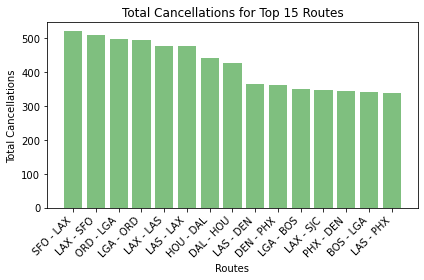

In [73]:
plot_cancel_count_df = cancel_count_df.sort_values(ascending=False)
plot_cancel_count_df = plot_cancel_count_df.reset_index()
plot_cancel_count_df["route"] = plot_cancel_count_df["Flight Deparature Airport"].str.cat(
    plot_cancel_count_df["Flight Arrival Airport"], sep=" - ")
top_15_cancel_route_df = plot_cancel_count_df.head(15)

# Set the x and y axis
x_axis = top_15_cancel_route_df["route"]
y_axis = top_15_cancel_route_df["Flight Cancelled/ Not Cancelled"]

# Generate bar plot
plt.bar(x_axis, y_axis, color="green", alpha=0.5, align="center")

# Set the orientation of the x axis labels to vertical
plt.xticks(rotation=45, ha="right")

# Set x axis and y axis labels and title of plot
plt.xlabel("Routes")
plt.ylabel("Total Cancellations")
plt.title("Total Cancellations for Top 15 Routes")

# Save and display the plot
plt.tight_layout()
plot_file_path = os.path.join("Images","route_cancellations_bar.png")
plt.savefig(plot_file_path)
plt.show()

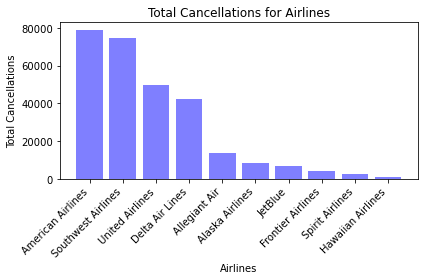

In [72]:
plot_airlines_df = airlines_cancel_count_df.sort_values(ascending=False)
plot_airlines_df = plot_airlines_df.reset_index()
top_15_cancel_airlines_df = plot_airlines_df

airlines_dict = {
    "AA" : "American Airlines",
    "AS" : "Alaska Airlines",
    "B6" : "JetBlue",
    "DL" : "Delta Air Lines",
    "F9" : "Frontier Airlines",
    "G4" : "Allegiant Air",
    "HA" : "Hawaiian Airlines",
    "NK" : "Spirit Airlines",
    "UA" : "United Airlines",
    "WN" : "Southwest Airlines"}

airlines = []
for airline in top_15_cancel_airlines_df["Airline Carrier"]:
    airlines.append(airlines_dict.get(airline))

# Set the x and y axis
x_axis = airlines
y_axis = top_15_cancel_airlines_df["Flight Cancelled/ Not Cancelled"]

# Generate bar plot
plt.bar(x_axis, y_axis, color="blue", alpha=0.5, align="center")

# Set the orientation of the x axis labels to vertical
plt.xticks(rotation=45, ha="right")

# Set x axis and y axis labels and title of plot
plt.xlabel("Airlines")
plt.ylabel("Total Cancellations")
plt.title("Total Cancellations for Airlines")

# Save and display the plot
plt.tight_layout()
plot_file_path = os.path.join("Images","airlines_cancellations_bar.png")
plt.savefig(plot_file_path)
plt.show()

# Analysis Summary


## What was the most affected route and airline during January to June 2020?

After collection and analysis, the flight's route data was parsed out by the top fifteen routes with the most cancellations and the airlines data by respective total cancellations throughout the time period. 

## Analysis of most affected route:

### Route with the most cancellations
* San Francisco International Airport - Los Angeles International Airport (521 cancellations)



## Analysis of mose affected airline:

### Airline with the most cancellations
* American Airlines (78,904 cancellations)



# Data Source:

Wrote a [Jupyter Notebook Script](https://github.com/ushaakumaar/Python-Project-1/tree/airlines/Resources) to split the csv file in the downloads folder available in [kaggle](https://www.kaggle.com/akulbahl/covid19-airline-flight-delays-and-cancellations) to retrieve all airlines data from January 2020 to June 2020 into nine CSV files (based on 300,000 rows of data) for further analysis.